In [ ]:
import zipfile
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Specify the zip file name
zip_file_name = 'triplicate dock.zip'

# Extract the zip file
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall('/content/triplicate_dock')  # Extract to a specific folder

# Verify the extracted files
extracted_files = os.listdir('/content/triplicate_dock/')
print("Extracted files:", extracted_files)

# Fix: Check if the extracted item is a directory, and if so, list its contents
for item in extracted_files:
    item_path = os.path.join('/content/triplicate_dock', item)
    if os.path.isdir(item_path):
        # If it's a directory, update extracted_files with the actual CSV files
        extracted_files = [os.path.join(item, f) for f in os.listdir(item_path) if f.endswith('.csv')]
        break  # Assume only one subdirectory with CSV files

print("CSV files:", extracted_files) # Print updated file list

# Inspect the structure of one of the CSV files
sample_file_path = os.path.join('/content/triplicate_dock', extracted_files[0])

Extracted files: ['triplicate dock']
CSV files: ['triplicate dock/HDAC11_rep3.csv', 'triplicate dock/HDAC9_rep2.csv', 'triplicate dock/HDAC4_rep2.csv', 'triplicate dock/HDAC3_rep1.csv', 'triplicate dock/HDAC11_rep2.csv', 'triplicate dock/HDAC2_rep1.csv', 'triplicate dock/HDAC6_rep2.csv', 'triplicate dock/HDAC10_rep2.csv', 'triplicate dock/HDAC6_rep3.csv', 'triplicate dock/HDAC3_rep2.csv', 'triplicate dock/HDAC7_rep3.csv', 'triplicate dock/HDAC6_rep1.csv', 'triplicate dock/HDAC10_rep1.csv', 'triplicate dock/HDAC4_rep3.csv', 'triplicate dock/HDAC1_rep2.csv', 'triplicate dock/HDAC10_rep3.csv', 'triplicate dock/HDAC5_rep3.csv', 'triplicate dock/HDAC7_rep2.csv', 'triplicate dock/HDAC8_rep2.csv', 'triplicate dock/HDAC7_rep1.csv', 'triplicate dock/HDAC3_rep3.csv', 'triplicate dock/HDAC1_rep3.csv', 'triplicate dock/HDAC5_rep1.csv', 'triplicate dock/HDAC8_rep3.csv', 'triplicate dock/HDAC2_rep3.csv', 'triplicate dock/HDAC9_rep1.csv', 'triplicate dock/HDAC8_rep1.csv', 'triplicate dock/HDAC11_rep1

In [ ]:
# Sort the DataFrame by Mean Binding Affinity in descending order
results_df = results_df.sort_values(by='Mean Binding Affinity', ascending=False)



Column names: Index(['Ligand', 'Binding Affinity', 'rmsd/ub', ' rmsd/lb'], dtype='object')
                                          Ligand  Binding Affinity  rmsd/ub  \
0  AF-Q96DB2-F1-model_v4_model1_1068_uff_E=49.01              -2.1    0.000   
1  AF-Q96DB2-F1-model_v4_model1_1068_uff_E=49.01              -2.0    2.242   
2  AF-Q96DB2-F1-model_v4_model1_1068_uff_E=49.01              -2.0    1.908   
3  AF-Q96DB2-F1-model_v4_model1_1068_uff_E=49.01              -1.9    2.510   
4  AF-Q96DB2-F1-model_v4_model1_1068_uff_E=49.01              -1.8    5.743   

    rmsd/lb  
0     0.000  
1     0.414  
2     1.908  
3     2.114  
4     5.257  
triplicate dock/HDAC11: [-2.1, -2.0, -2.0, -1.9, -1.8, -1.8, -1.8, -1.7, -1.7, -7.7, -7.7, -7.4, -7.4, -7.3, -7.2, -7.2, -7.2, -7.1, -4.3, -4.1, -4.0, -3.9, -3.9, -3.9, -3.9, -3.9, -3.9, -5.1, -5.1, -4.4, -4.3, -4.3, -4.3, -4.1, -4.0, -4.0, -7.4, -7.3, -7.3, -7.2, -7.1, -7.1, -7.0, -7.0, -7.0, -4.3, -4.3, -4.0, -4.0, -3.9, -3.9, -3.8, -3.8, -3.7, -

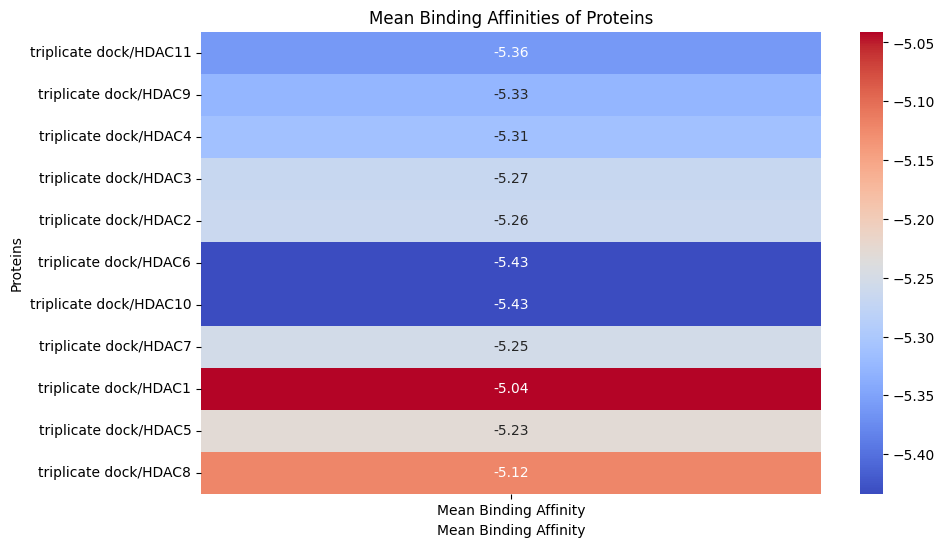

                        Mean Binding Affinity  Standard Deviation
triplicate dock/HDAC11              -5.361435            1.367191
triplicate dock/HDAC9               -5.326743            1.460992
triplicate dock/HDAC4               -5.311650            1.558698
triplicate dock/HDAC3               -5.267153            1.377849
triplicate dock/HDAC2               -5.263354            1.399750
triplicate dock/HDAC6               -5.432689            1.447829
triplicate dock/HDAC10              -5.433655            1.437393
triplicate dock/HDAC7               -5.253976            1.543029
triplicate dock/HDAC1               -5.040844            1.441592
triplicate dock/HDAC5               -5.228807            1.527001
triplicate dock/HDAC8               -5.120806            1.334478


In [ ]:
# Inspect the structure of one of the CSV files
sample_file_path = os.path.join('/content/triplicate_dock', extracted_files[0])  # Pick the first file for inspection
sample_df = pd.read_csv(sample_file_path)
print("Column names:", sample_df.columns)
print(sample_df.head())  # Display the first few rows

# Initialize a dictionary to store binding affinities for each protein
binding_affinities = {}

# Loop through each CSV file to collect binding affinities
for filename in extracted_files:
    # Construct the full path to the file
    file_path = os.path.join('/content/triplicate_dock', filename)

    # Read the CSV file
    df = pd.read_csv(file_path)

    # Extract the binding affinity column
    protein_name = filename.split('_')[0]  # Get the protein name (e.g., HDAC1)

    if protein_name not in binding_affinities:
        binding_affinities[protein_name] = []

    # Append the binding affinities to the corresponding protein
    binding_affinities[protein_name].extend(df['Binding Affinity'].tolist())

# Print binding affinities collected
for protein, scores in binding_affinities.items():
    print(f"{protein}: {scores}")

# Calculate mean and standard deviation for each protein
mean_scores = {}
std_scores = {}

for protein, scores in binding_affinities.items():
    if scores:  # Check if scores list is not empty
        mean_scores[protein] = np.mean(scores)
        std_scores[protein] = np.std(scores)

# Print scores for verification
print("Mean Scores:", mean_scores)
print("Standard Deviation Scores:", std_scores)

# Create a DataFrame for heatmap visualization if scores are available
if mean_scores:  # Only create DataFrame if there are mean scores
    results_df = pd.DataFrame({
        'Mean Binding Affinity': mean_scores,
        'Standard Deviation': std_scores
    })

    # Generate a heatmap for mean binding affinities
    plt.figure(figsize=(10, 6))
    sns.heatmap(results_df[['Mean Binding Affinity']], annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Mean Binding Affinities of Proteins')
    plt.ylabel('Proteins')
    plt.xlabel('Mean Binding Affinity')
    plt.show()  # Show the plot

    # Print results for verification
    print(results_df)
else:
    print("No binding affinity scores were collected.")
